## Improvements done as suggested by Dr.Miller and Mr.Chang in class presentation
1. Sigmoid added to list of activation functions and results are noted.
2. Random Forest ran on both MNIST and Fashion MNIST. 
3. Results are updated with more decisive wordings.

In [1]:
random_seed=7
from numpy.random import seed
seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
import numpy as np
from IPython.display import clear_output
import sys
sys.path.append('../exploringActivations/')
from data import Datasets
from activation_functions import CustomActivation
from models import CNN,DNN,CAE
import matplotlib.pyplot as plt
import scipy as sci
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import pandas as pd
from tensorflow.keras import backend as K
import math
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras.activations import sigmoid, selu

Using TensorFlow backend.


In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [3]:
def plot_model(history,name,modelname,datasetname):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(name+'-'+modelname+'model accuracy on'+datasetname)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    #fig= plt.figure()
    plt.savefig('../results/'+name+'_'+modelname+'_'+datasetname)
    plt.show()


In [8]:
def run_forrest_run(dataset_list, activation_list, modelname): 
    for dataset_name in dataset_list:
        for name in activation_list:
            for model in modelname: 
                if model=="DNN": 
                    dataset=Datasets()
                    if(dataset_name =='MNIST'): 
                        x_train,x_test,y_train,y_test=dataset.get_mnist("DNN")
                        num_classes=dataset.num_classes
                        input_shape=dataset.input_shape
                    elif(dataset_name=='Fashion-MNIST'):
                        x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("DNN")
                        num_classes=dataset.num_classes
                        input_shape=dataset.input_shape
                    dnn = DNN(name)
                    score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test,1)
            
                else:
                    dataset=Datasets()
                    if(dataset_name =='MNIST'): 
                        x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
                    elif(dataset_name=='Fashion-MNIST'):
                        x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
                    num_classes=dataset.num_classes
                    input_shape=dataset.input_shape
                    if model =="CNN":
                        cnn = CNN(name)
                        score,history = cnn.run_model(input_shape, x_train, x_test, y_train, y_test)
                    elif model =="CAE":
                        cae = CAE(name)
                        score,history = cae.run_model(input_shape, x_train, x_test, y_train, y_test)
                    score,history = cnn.run_model(input_shape, x_train, x_test, y_train, y_test)
                plot_model(history,name,model,dataset_name)

## Main running script , all deep models can be run for each activation using this.

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5333 - acc: 0.8604 - val_loss: 0.3133 - val_acc: 0.9096
Epoch 2/500
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3095 - acc: 0.9105 - val_loss: 0.2761 - val_acc: 0.9222
Epoch 3/500
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2721 - acc: 0.9209 - val_loss: 0.2618 - val_acc: 0.9211
Epoch 4/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2420 - acc: 0.9308 - val_loss: 0.2300 - val_acc: 0.9315
Epoch 5/500
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2137 - acc: 0.9379 - val_loss: 0.2006 - val_acc: 0.9400
Epoch 6/500
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1898 - acc: 0.9458 - val_loss: 0.1826 - val_acc: 0.9464
Epoch 7/500
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1692 - acc: 0.9510 - val_l

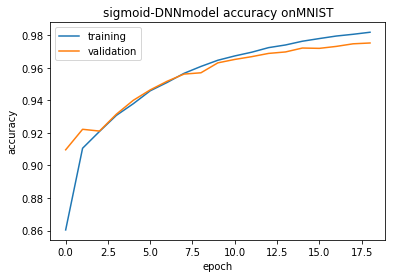

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 20s 337us/sample - loss: 2.3263 - acc: 0.1080 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/500
60000/60000 [==============================] - 18s 297us/sample - loss: 1.5651 - acc: 0.4225 - val_loss: 0.3398 - val_acc: 0.9014
Epoch 3/500
60000/60000 [==============================] - 18s 301us/sample - loss: 0.3627 - acc: 0.8934 - val_loss: 0.2234 - val_acc: 0.9337
Epoch 4/500
60000/60000 [==============================] - 18s 299us/sample - loss: 0.2830 - acc: 0.9170 - val_loss: 0.1799 - val_acc: 0.9436
Epoch 5/500
60000/60000 [==============================] - 25s 414us/sample - loss: 0.2437 - acc: 0.9283 - val_loss: 0.1544 - val_acc: 0.9545
Epoch 6/500
60000/60000 [==============================] - 25s 421us/sample - loss: 0.2168 - acc: 0.9362 - val_loss: 0.1478 -

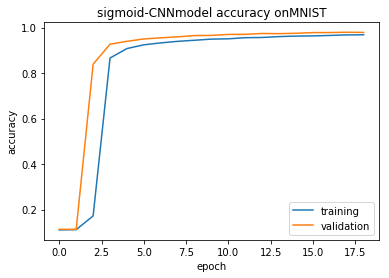

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 5s 82us/sample - loss: 2.3058 - acc: 0.1103 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/500
60000/60000 [==============================] - 4s 68us/sample - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/500
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/500
60000/60000 [==============================] - 4s 71us/sample - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 00004: early stopping
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 106us/sample - loss: 2.3186 - acc: 0.1096 - val_loss: 2.3008 - val_acc: 0.1135
Epoch 2/500
60000/60000 [==============================] - 6s 100us/sample - loss: 2.3009 - acc: 0.1124 - val_loss: 2.2930 - val_acc: 0.1135
Epoch 3/500
60000/60000 [=====

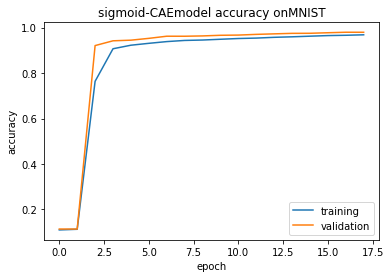

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 2s 33us/sample - loss: 0.6648 - acc: 0.7696 - val_loss: 0.5364 - val_acc: 0.8050
Epoch 2/500
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4763 - acc: 0.8310 - val_loss: 0.5387 - val_acc: 0.7940
Epoch 00002: early stopping


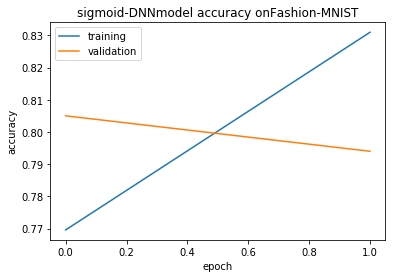

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 103us/sample - loss: 2.3146 - acc: 0.1003 - val_loss: 2.3025 - val_acc: 0.1000
Epoch 2/500
60000/60000 [==============================] - 6s 97us/sample - loss: 2.1813 - acc: 0.1542 - val_loss: 0.9230 - val_acc: 0.6453
Epoch 3/500
60000/60000 [==============================] - 6s 96us/sample - loss: 0.7263 - acc: 0.7266 - val_loss: 0.5919 - val_acc: 0.7585
Epoch 4/500
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5867 - acc: 0.7803 - val_loss: 0.5193 - val_acc: 0.8040
Epoch 5/500
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5353 - acc: 0.8015 - val_loss: 0.4845 - val_acc: 0.8198
Epoch 6/500
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5063 - acc: 0.8130 - val_loss: 0.4591 - val_acc: 0.8286
Epoch 7/500
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4867 - acc: 0.8204 - val_

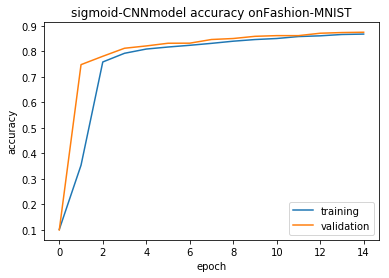

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3052 - acc: 0.0986 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/500
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/500
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/500
60000/60000 [==============================] - 4s 69us/sample - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 00004: early stopping
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 6s 105us/sample - loss: 2.3149 - acc: 0.1023 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/500
60000/60000 [==============================] - 6s 97us/sample - loss: 2.3028 - acc: 0.1029 - val_loss: 2.3023 - val_acc: 0.1000
Epoch 3/500
60000/60000 [======

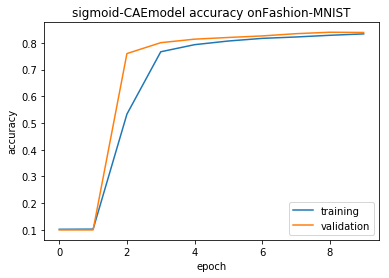

In [9]:
#running script.../seperate tests are done below
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu','sigmoid']
modelname=["DNN","CNN","CAE"]
single_activation=['sigmoid']
run_forrest_run(dataset_list,single_activation, modelname)

## Random Forest on MNIST and Fashion MNIST for baseline for both

In [11]:
# running random forest on MNIST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dataset = Datasets()
x_train,x_test,y_train,y_test=dataset.get_mnist("DNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
print("Compute predictions")
predicted = clf.predict(x_test)
print("Val Accuracy: ", accuracy_score(y_test, predicted))

print("Compute predictions")
predicted = clf.predict(x_train)
print("Train Accuracy: ", accuracy_score(y_train, predicted))

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Compute predictions
Test Accuracy:  0.9694
Compute predictions
Train Accuracy:  1.0


In [12]:
# running random forest on Fashion-MNIST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dataset = Datasets()
x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("DNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
print("Compute predictions")
predicted = clf.predict(x_test)
print("Val Accuracy: ", accuracy_score(y_test, predicted))

print("Compute predictions")
predicted = clf.predict(x_train)
print("Train Accuracy: ", accuracy_score(y_train, predicted))

(60000, 784)
(60000, 784)
(10000, 784)
(10000,)
(60000,)
Compute predictions
Test Accuracy:  0.8776
Compute predictions
Train Accuracy:  1.0


## Individual testing of each Model 

In [ ]:
#testing for DNN
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="DNN"
for dataset_name in dataset_list:
    for name in activation_list:
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("DNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("DNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        dnn = DNN(name)
        score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test,1)
        plot_model(history,name,modelname,dataset_name)

In [ ]:
#testing for Convoluted Auto encoders
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="CAE"
for dataset_name in dataset_list:
    for name in activation_list:
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        dnn = CAE(name)
        score,history = dnn.run_model(input_shape, x_train, x_test, y_train, y_test)
        plot_model(history,name,modelname,dataset_name)

In [ ]:
#testing for CNN
dataset_list=['MNIST', 'Fashion-MNIST']
activation_list=['swish','selu', 'gelu', 'relu']
modelname="CNN"
for dataset_name in dataset_list:
    for name in activation_list: 
        dataset=Datasets()
        if(dataset_name =='MNIST'): 
            x_train,x_test,y_train,y_test=dataset.get_mnist("CNN")
        elif(dataset_name=='Fashion-MNIST'):
            x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
        num_classes=dataset.num_classes
        input_shape=dataset.input_shape
        # x_train=dataset.edge_detection(x_train)
        # x_test=dataset.edge_detection(x_test)
        print(input_shape)
        print(x_train.shape)
        print(x_test.shape)
        print(y_test.shape)
        print(y_train.shape)
        cnn = CNN(name)
        model,history=cnn.run_model(input_shape, x_train, x_test, y_train, y_test)
        plot_model(history,name,modelname,dataset_name)

# EDA and Data preprocessing

In [13]:
dataset=Datasets()
x_train,x_test,y_train,y_test=dataset.get_fashion_mnist("CNN")
num_classes=dataset.num_classes
input_shape=dataset.input_shape
# x_train=dataset.edge_detection(x_train)
# x_test=dataset.edge_detection(x_test)
print(input_shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(unique_elements)
print(counts_elements)


(28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(60000,)
[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [14]:
x_train[0].shape

(28, 28, 1)

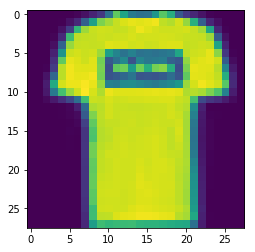

In [15]:
x_geo=dataset.filtering(x_train[1,:,:,0])
plt.imshow(x_geo)
plt.savefig('../results/filtered_images.png')

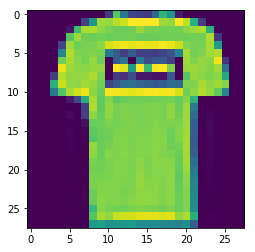

In [16]:
plt.imshow(x_train[1,:,:,0])
plt.savefig('../results/normal_images.png')

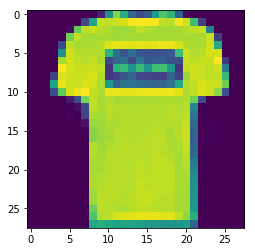

In [17]:
x_den=dataset.denoising(x_train[1,:,:,0])
plt.imshow(x_den)
plt.savefig('../results/denoised_images.png')

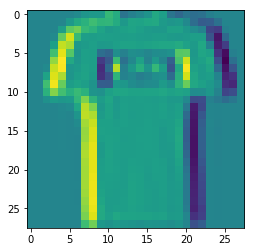

In [18]:
x_ed=dataset.edge_detection(x_train[1,:,:,0])
plt.imshow(x_ed)
plt.savefig('../results/edge_images.png')